In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Charger les données depuis un fichier CSV (ou une autre source de données)
vehicule_rubrique = pd.read_csv('/content/vehicule_rubrique.csv')
vehicule_rubrique.head()

,web-scraper-order,web-scraper-start-url,articles_links,articles_links-href,Brand,Price,Address,image_link-src
0,1732661566-1,https://dakarvente.com/index.php?page=annonces...,Dacia stepway,https://www.dakarvente.com/annonce-158-dacia-s...,Dacia stepway,3.800.000 FCFA,Plateau,media/annonces/pics/c0137e74e63e3bf1b6135c6edf...
1,1732661569-2,https://dakarvente.com/index.php?page=annonces...,Dacia logan,https://www.dakarvente.com/annonce-157-dacia-l...,Dacia logan,3.000.000 FCFA,Plateau,media/annonces/pics/ca309c18cc085b9d183590fe07...
2,1732661573-3,https://dakarvente.com/index.php?page=annonces...,Hyundai tucson,https://www.dakarvente.com/annonce-151-hyundai...,Hyundai tucson,3.900.000 FCFA,Plateau,media/annonces/pics/06b89dc425a73f1336cd6a8482...
3,1732661577-4,https://dakarvente.com/index.php?page=annonces...,Vends Citroën c4,https://www.dakarvente.com/annonce-150-vends-c...,Vends Citroën c4,3.100.000 FCFA,Plateau,media/annonces/pics/dbc006e3887025377b07a321fc...
4,1732661581-5,https://dakarvente.com/index.php?page=annonces...,Vends Ford explorer année 2013 essence,https://www.dakarvente.com/annonce-131-vends-f...,Vends Ford explorer année 2013 essence,16.500.000 FCFA,Plateau,media/annonces/pics/8d38f4bc7eae754b442d5bd08f...


In [14]:
df = vehicule_rubrique[['Brand','Price','Address','image_link-src']]

In [15]:
df.head()

,Brand,Price,Address,image_link-src
0,Dacia stepway,3.800.000 FCFA,Plateau,media/annonces/pics/c0137e74e63e3bf1b6135c6edf...
1,Dacia logan,3.000.000 FCFA,Plateau,media/annonces/pics/ca309c18cc085b9d183590fe07...
2,Hyundai tucson,3.900.000 FCFA,Plateau,media/annonces/pics/06b89dc425a73f1336cd6a8482...
3,Vends Citroën c4,3.100.000 FCFA,Plateau,media/annonces/pics/dbc006e3887025377b07a321fc...
4,Vends Ford explorer année 2013 essence,16.500.000 FCFA,Plateau,media/annonces/pics/8d38f4bc7eae754b442d5bd08f...


In [17]:
df.dtypes

,0
Brand,object
Price,object
Address,object
image_link-src,object


In [23]:
# Supprimer 'FCFA' et les virgules, puis convertir en entier
df['Price'] = df['Price'].str.replace(' FCFA', '')
df.head()

<ipython-input-23-e4fe26be1a9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(' FCFA', '')


,Brand,Price,Address,image_link-src
0,Dacia stepway,3.800.000,Plateau,media/annonces/pics/c0137e74e63e3bf1b6135c6edf...
1,Dacia logan,3.000.000,Plateau,media/annonces/pics/ca309c18cc085b9d183590fe07...
2,Hyundai tucson,3.900.000,Plateau,media/annonces/pics/06b89dc425a73f1336cd6a8482...
3,Vends Citroën c4,3.100.000,Plateau,media/annonces/pics/dbc006e3887025377b07a321fc...
4,Vends Ford explorer année 2013 essence,16.500.000,Plateau,media/annonces/pics/8d38f4bc7eae754b442d5bd08f...


In [35]:
df.isna().sum()

,0
Brand,0
Price,0
Address,0
image_link-src,0


In [36]:
df.shape

(1595, 4)

In [34]:
df.dropna(inplace=True)

<ipython-input-34-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Supprimer les points
df['Price'] = df['Price'].str.replace('.', '', regex=False)

# Convertir en entier
df['Price'] = df['Price'].astype(int)



In [41]:
df.head()

,Brand,Price,Address,image_link-src
0,Dacia stepway,3800000,Plateau,media/annonces/pics/c0137e74e63e3bf1b6135c6edf...
1,Dacia logan,3000000,Plateau,media/annonces/pics/ca309c18cc085b9d183590fe07...
2,Hyundai tucson,3900000,Plateau,media/annonces/pics/06b89dc425a73f1336cd6a8482...
3,Vends Citroën c4,3100000,Plateau,media/annonces/pics/dbc006e3887025377b07a321fc...
4,Vends Ford explorer année 2013 essence,16500000,Plateau,media/annonces/pics/8d38f4bc7eae754b442d5bd08f...


In [40]:
# Supprimer les espaces
df['Price'] = df['Price'].str.strip()

# Convertir en entier
df['Price'] = df['Price'].astype(int)



<ipython-input-40-3458139a8201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.strip()
<ipython-input-40-3458139a8201>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(int)


In [44]:
df['Brand'].unique()

array(['Dacia stepway', 'Dacia logan', 'Hyundai tucson', ...,
       'Burgman 400', 'Chevrolet Trax 2013', 'Camion Citerne à eau'],
      dtype=object)

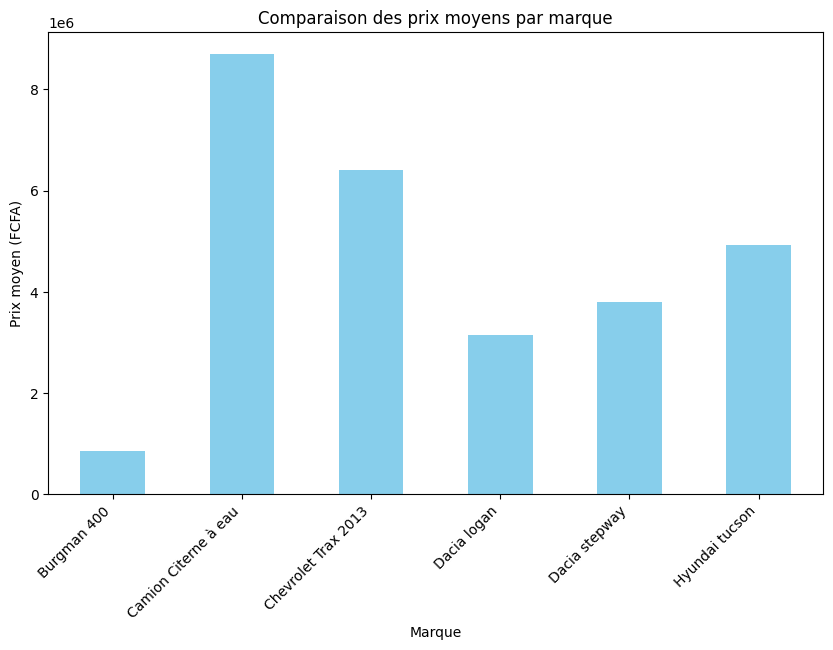

In [46]:
import matplotlib.pyplot as plt

# Sélectionner les marques spécifiques mentionnées
selected_marques = [
    'Dacia stepway', 'Dacia logan', 'Hyundai tucson', 'Burgman 400',
    'Chevrolet Trax 2013', 'Camion Citerne à eau'
]

# Filtrer le DataFrame pour ne conserver que ces marques
df_selected = df[df['Brand'].isin(selected_marques)]

# Grouper par marque et calculer le prix moyen
marque_prix_moyen = df_selected.groupby('Brand')['Price'].mean()

# Créer le graphique en barres
plt.figure(figsize=(10,6))
marque_prix_moyen.plot(kind='bar', color='skyblue')
plt.xlabel('Marque')
plt.ylabel('Prix moyen (FCFA)')
plt.title('Comparaison des prix moyens par marque')
plt.xticks(rotation=45, ha='right')
plt.show()


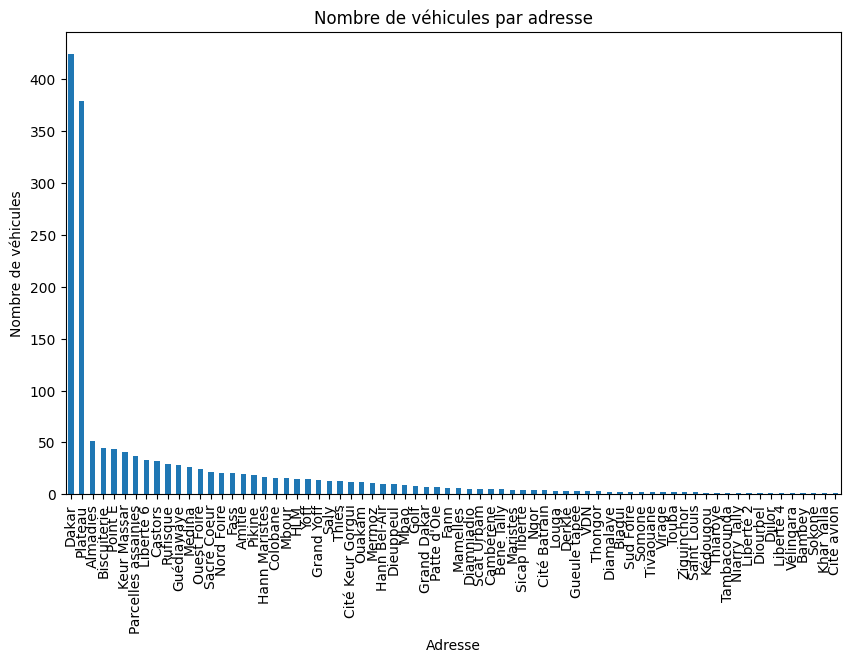

In [48]:
#Nombre de vehicules par adresse
# Compter le nombre de véhicules par adresse
adresse_counts = df['Address'].value_counts()

# Créer le graphique en barres
plt.figure(figsize=(10,6))
adresse_counts.plot(kind='bar')
plt.xlabel('Adresse')
plt.ylabel('Nombre de véhicules')
plt.title('Nombre de véhicules par adresse')
plt.xticks(rotation=90)
plt.show()


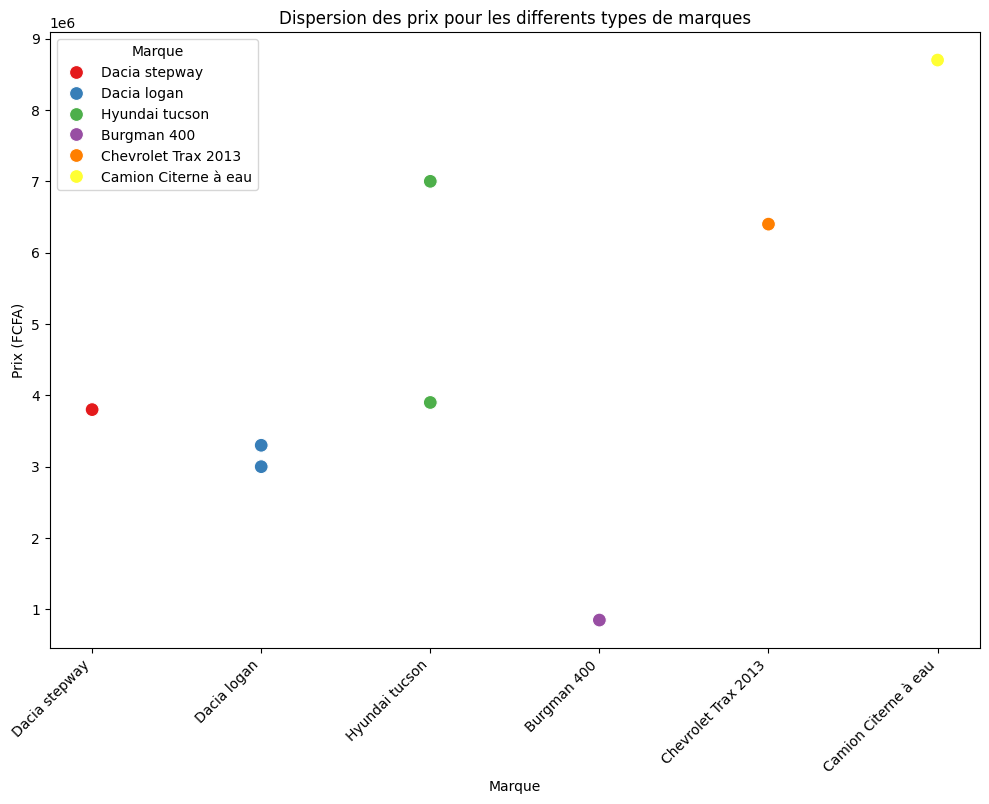

In [52]:
#Nuage de points des prix par marque
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les marques spécifiques mentionnées
selected_marques = [
    'Dacia stepway', 'Dacia logan', 'Hyundai tucson', 'Burgman 400',
    'Chevrolet Trax 2013', 'Camion Citerne à eau'
]

# Filtrer le DataFrame pour ne conserver que ces marques
df_selected = df[df['Brand'].isin(selected_marques)]

# Créer le nuage de points
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_selected, x='Brand', y='Price', hue='Brand', palette='Set1', s=100)
plt.xlabel('Marque')
plt.ylabel('Prix (FCFA)')
plt.title('Dispersion des prix pour les differents types de marques')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marque')
plt.show()


In [55]:
import pandas as pd

# Supposons que df soit votre DataFrame

# Compter le nombre de véhicules par marque et trier par fréquence
marque_counts = df['Brand'].value_counts()

# Afficher les marques les plus fréquentes
print(marque_counts)


Brand
Peugeot 308                   13
Peugeot 407                   11
Peugeot 307                   11
Ford focus                    10
Ford escape                   10
                              ..
Renault clio sw                1
Jeep cheeroke 2015 essence     1
Jeep cheeroke                  1
Sym wolf 250                   1
Camion Citerne à eau           1
Name: count, Length: 1254, dtype: int64


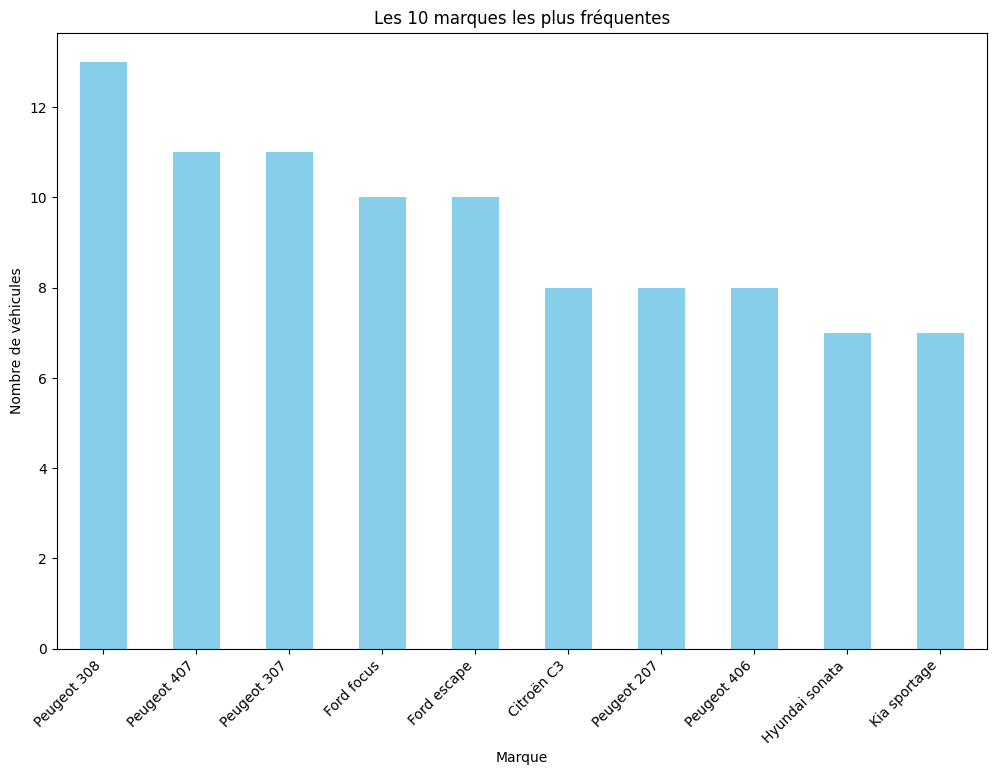

In [56]:
import matplotlib.pyplot as plt

# Afficher les 10 marques les plus fréquentes
top_marques = marque_counts.head(10)

plt.figure(figsize=(12,8))
top_marques.plot(kind='bar', color='skyblue')
plt.xlabel('Marque')
plt.ylabel('Nombre de véhicules')
plt.title('Les 10 marques les plus fréquentes')
plt.xticks(rotation=45, ha='right')
plt.show()
